# EDA

## Correlations

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



%matplotlib inline

In [33]:
client_attrition = pd.read_csv('../data/preprocessed/client_attrition_train.csv', sep=";")
client_attrition_not_processed = pd.read_csv('../data/client_attrition_train.csv', sep=",")
client_attrition_not_processed['account_status'] = client_attrition_not_processed['account_status'].map(dict(open=0,closed=1))

All in all correlations are not significant apart from customer_age vs customer_relaltionship_length

The same conclusion can be drawn for not processed dataset

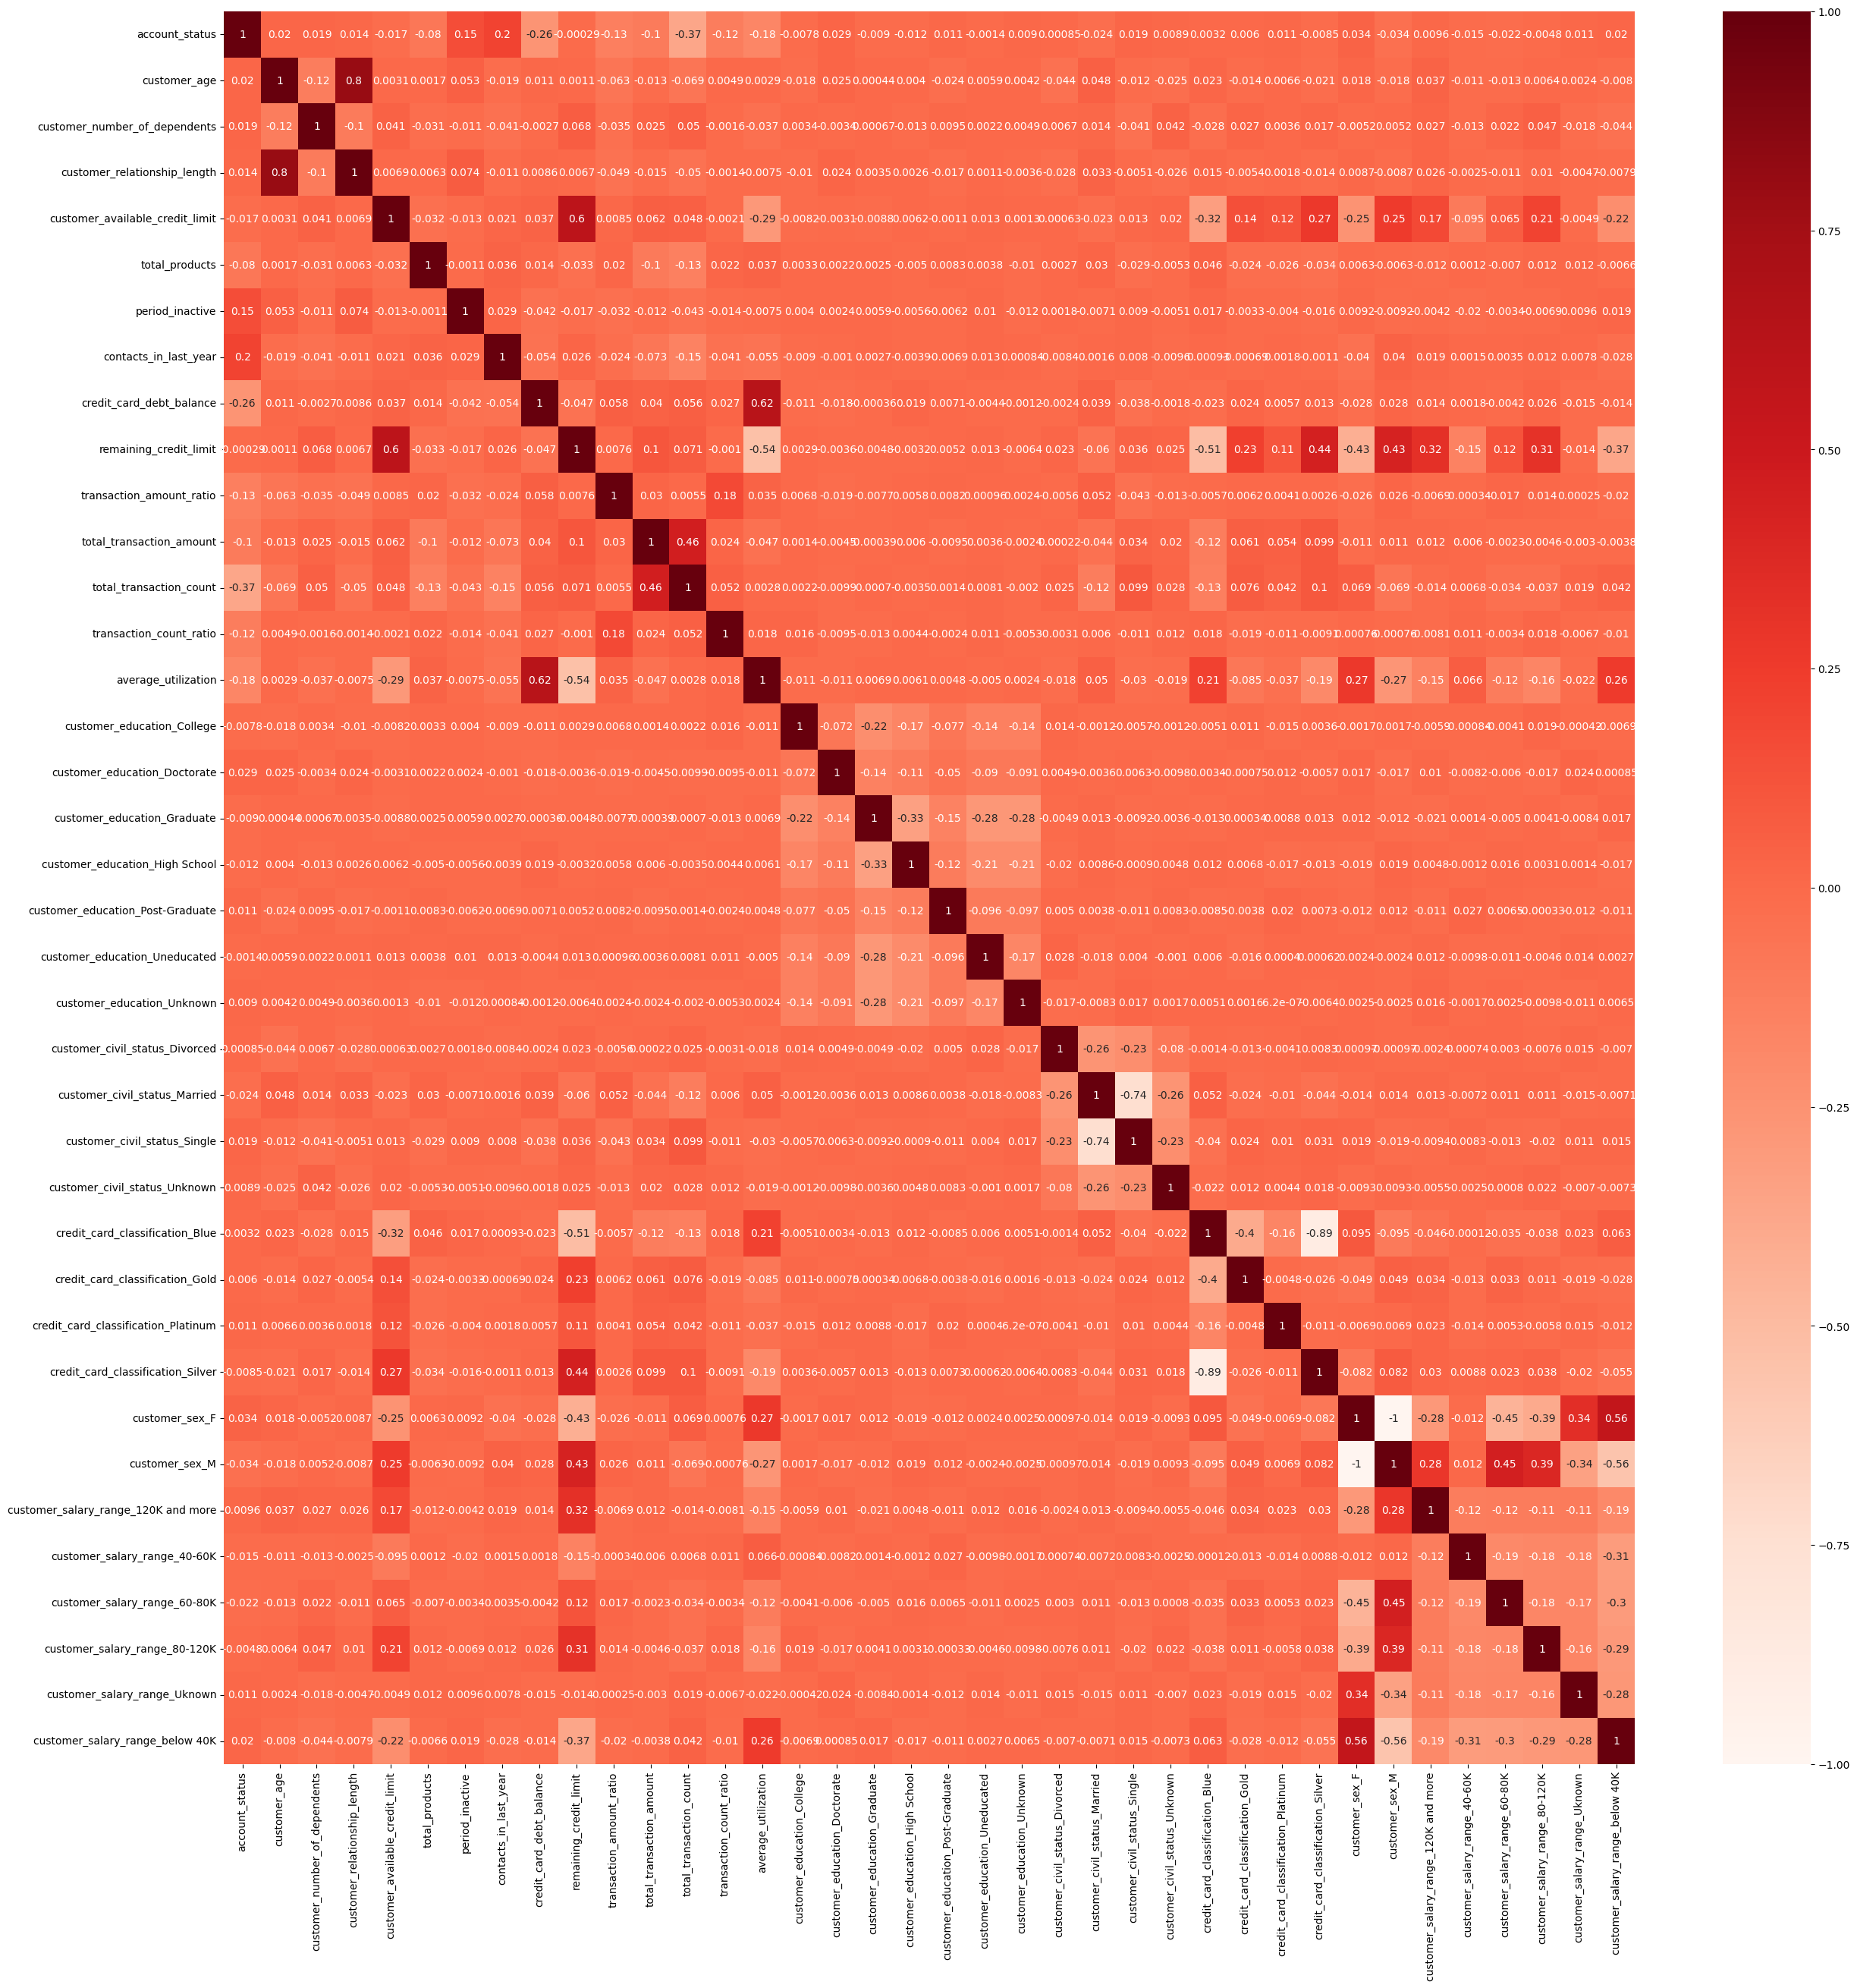

In [7]:
#Using Pearson Correlation
plt.figure(figsize=(30,30))
cor = client_attrition.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [14]:
print(abs(cor["account_status"])[abs(cor["account_status"])>0.5])
# print(abs(cor)[abs(cor)>0.5])

account_status    1.0
Name: account_status, dtype: float64


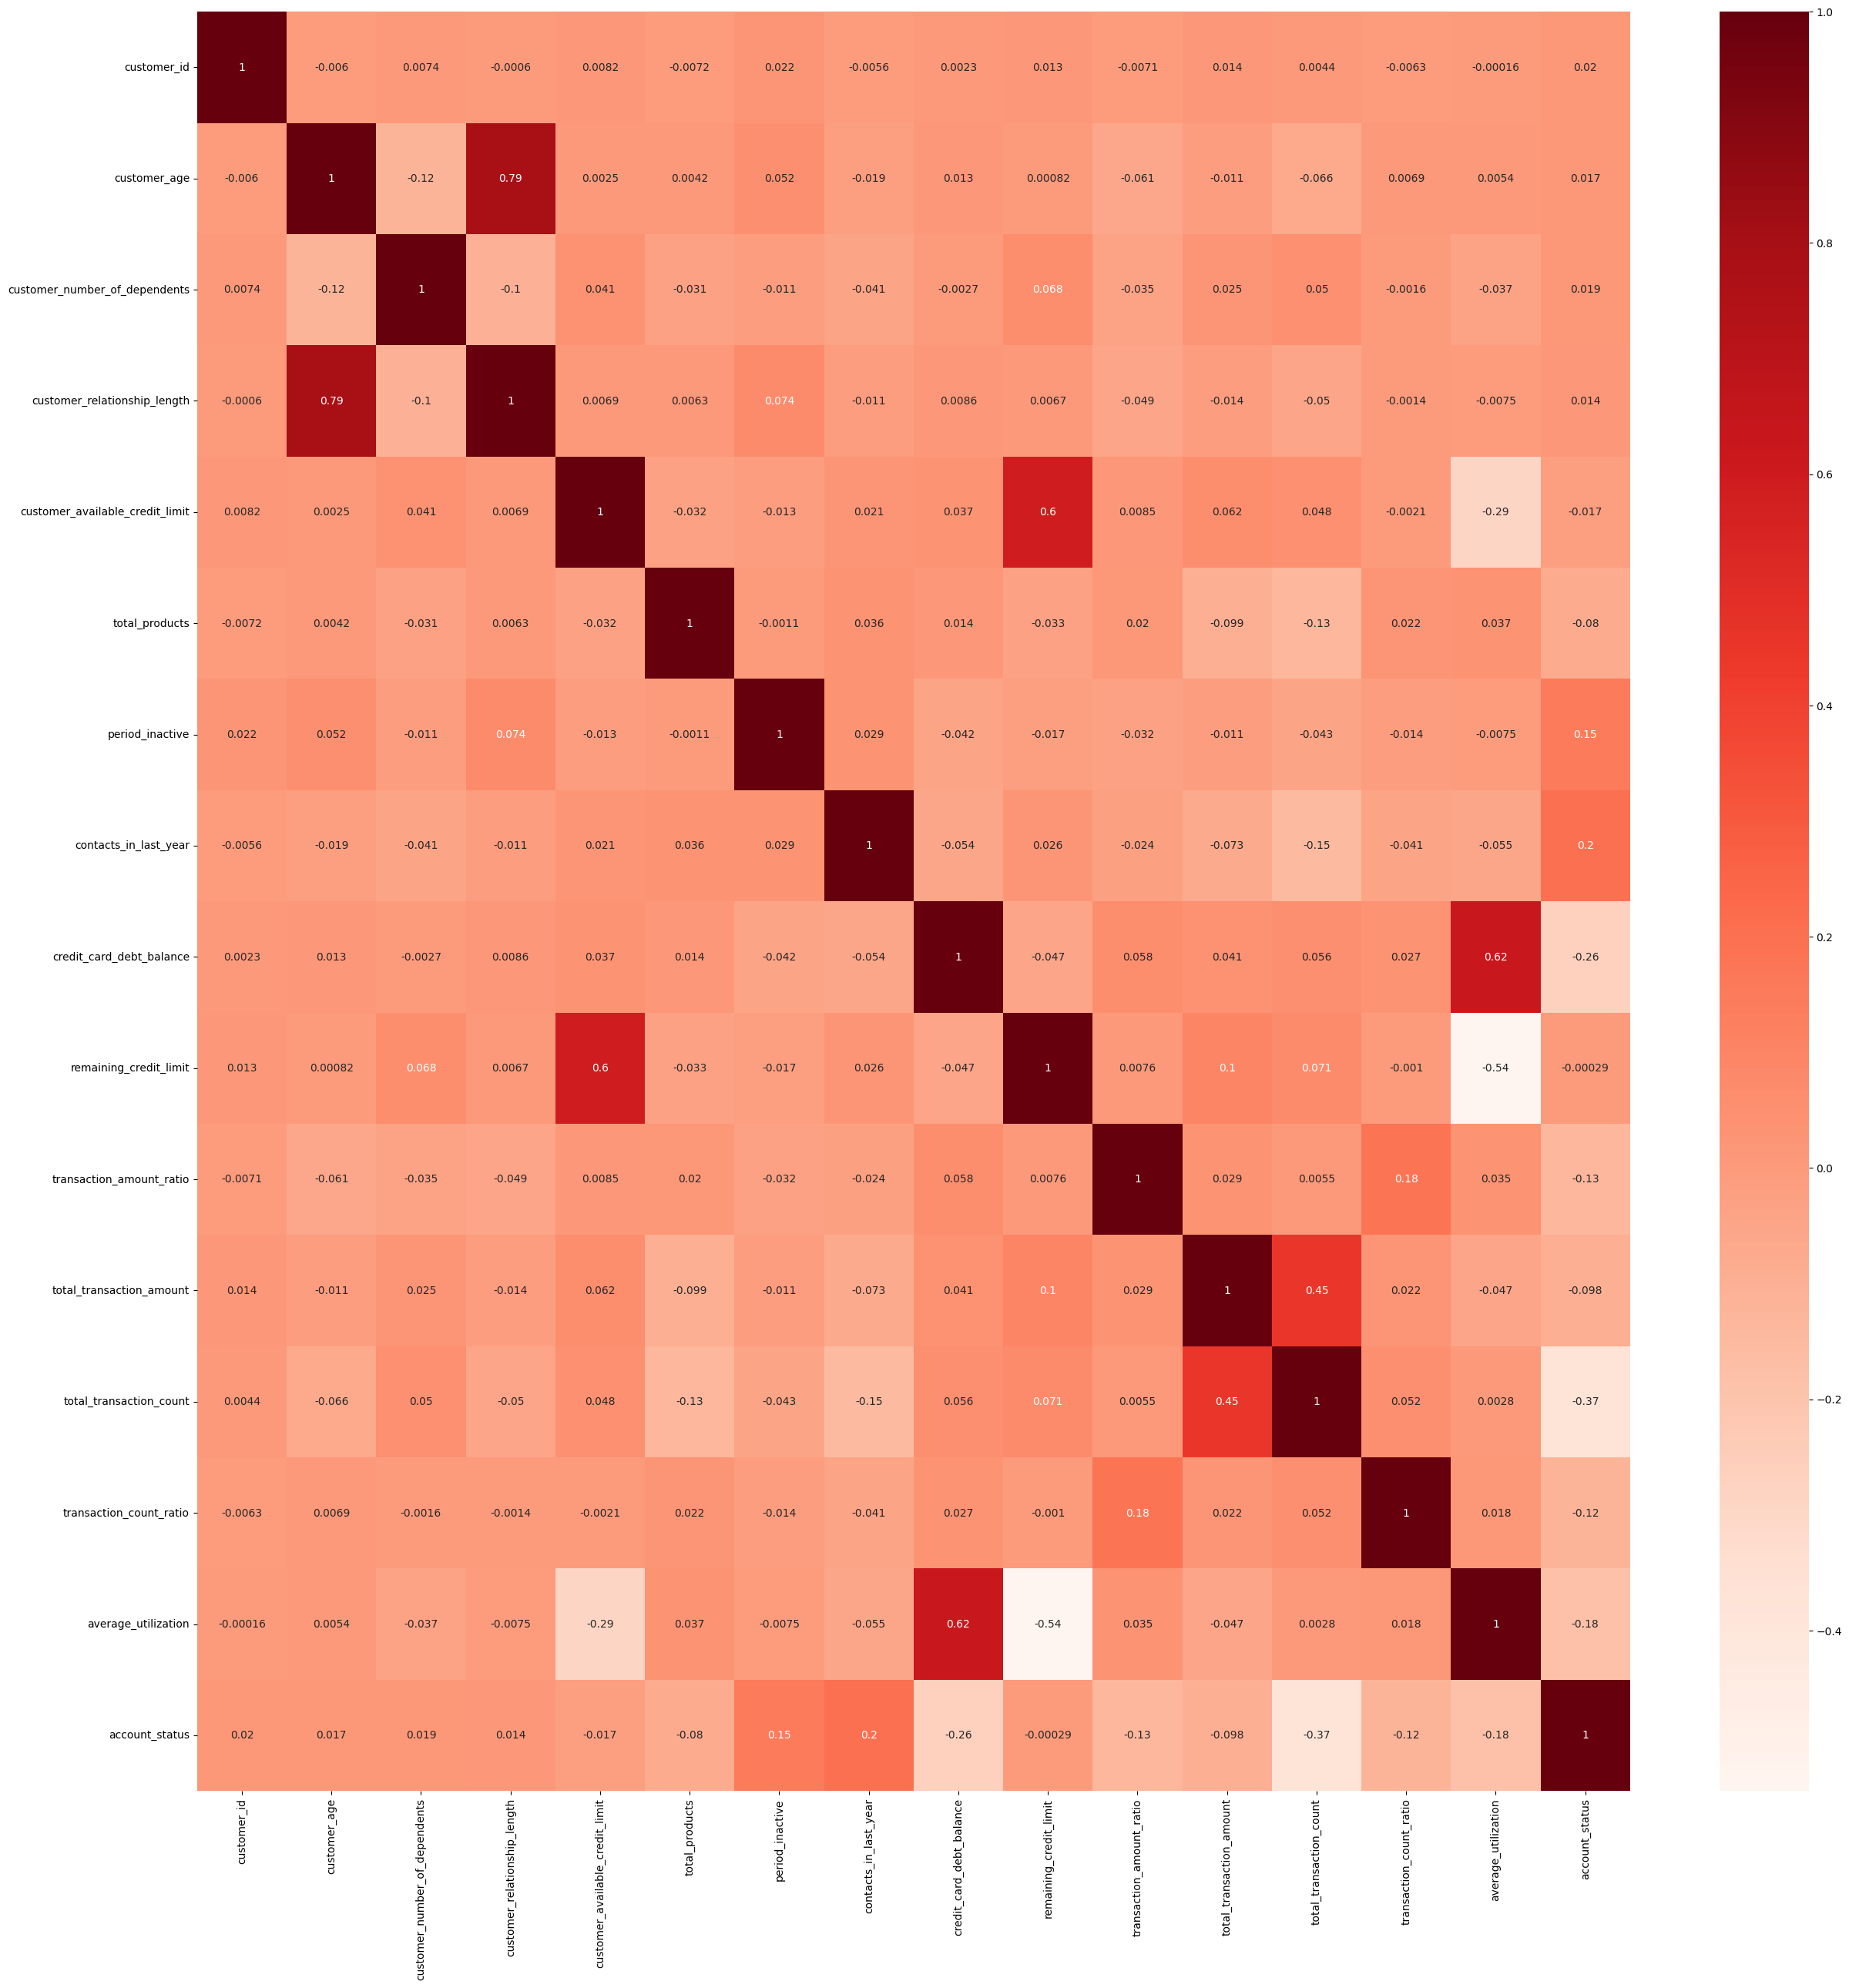

In [34]:
#Using Pearson Correlation
plt.figure(figsize=(30,30))
cor = client_attrition_not_processed.select_dtypes(exclude= ['object']).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [35]:
print(abs(cor["account_status"])[abs(cor["account_status"])>0.5])

account_status    1.0
Name: account_status, dtype: float64
